In [1]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#time is in the form XXH:XXm:XXs, so we need to convert it to seconds
def convert_time(time):
    hours = int(time[0:2])
    mins = int(time[4:6])
    secs = int(time[8:10])
    return hours*3600 + mins*60 + secs


In [3]:
phases = pd.read_excel('phases.xlsx')
#include only vid_id's 'vid_7', 'vid_15', 'vid_21', 'vid_18', vid_6', and 'vid_0'
phases = phases[phases['vid_id'].isin(['vid_7', 'vid_15', 'vid_21', 'vid_18', 'vid_6', 'vid_0'])]
phases['vid_id'].value_counts()


/home/kchen/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


vid_id
vid_7     40
vid_6     28
vid_21    28
vid_15    27
vid_18    22
vid_0     21
Name: count, dtype: int64

In [4]:
#for each row in the dataframe, make sure that time_start and time_end are integers
phases.reset_index(inplace=True)
for i in range(len(phases)):
    try:
        start1 = convert_time(phases['time_start'][i])
        end1 = convert_time(phases['time_end'][i])
    except:
        print(i)
        print(phases['time_start'][i])
        print(phases['time_end'][i])


In [5]:
phase_list = phases['phase'].unique()
phase_list


array(['oob', 'exposure', 'hiatal_dissec', 'eso_mob', 'fundus_mob',
       'sac_excision', 'hiatal_repair', 'peg_placement', 'wrap', 'other',
       'sac_reduction'], dtype=object)

In [6]:
phases['path'] = np.NaN
#if vid_id contains 'vid', then path starts with 'unc/raw_ids', elif vid_id contains 'yale', then path starts with 'yale/raw_ids'
for i, row in phases.iterrows():
    if 'vid' in row['vid_id']:
        phases.loc[i, 'path'] = 'unc/raw_ids/' + row['vid_id'] + '.mp4'
    elif 'yale' in row['vid_id']:
        phases.loc[i, 'path'] = 'yale/raw_ids/' + row['vid_id'] + '.mp4'
    else:
        print('error')
phases.head()


,index,vid_id,phase,time_start,time_end,labeler,labeler_2,path
0,0,vid_0,oob,00H:00m:00s,00H:03m:18s,kc,NaN,unc/raw_ids/vid_0.mp4
1,1,vid_0,exposure,00H:03m:18s,00H:08m:44s,kc,NaN,unc/raw_ids/vid_0.mp4
2,2,vid_0,hiatal_dissec,00H:08m:45s,00H:16m:41s,kc,NaN,unc/raw_ids/vid_0.mp4
3,3,vid_0,eso_mob,00H:16m:42s,00H:18m:21s,kc,NaN,unc/raw_ids/vid_0.mp4
4,4,vid_0,hiatal_dissec,00H:18m:22s,00H:19m:04s,kc,NaN,unc/raw_ids/vid_0.mp4


In [7]:
vid_id = phases['vid_id'][0]
phase = phases['phase'][0]
time_start = phases['time_start'][0]
time_end = phases['time_end'][0]
vid_fname = phases['path'][0]
time_start_sec = convert_time(time_start)
time_end_sec = convert_time(time_end)
print(time_start_sec, time_end_sec)


0 198


In [8]:
vid_fname = phases['path'][0]
vid_fname

'unc/raw_ids/vid_0.mp4'

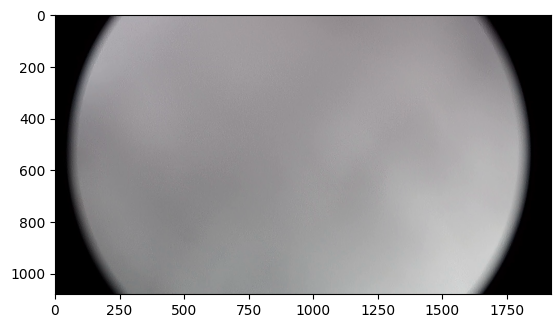

In [9]:
#show the first frame of the video
cap = cv2.VideoCapture(vid_fname)
ret, frame = cap.read()
plt.imshow(frame)
plt.show()


In [10]:
# for i in range(len(phases)):
#     vid_id = phases['vid_id'][i]
#     vid_fname = phases['path'][i]
#     phase = phases['phase'][i]
#     time_start = phases['time_start'][i]
#     time_end = phases['time_end'][i]
#     time_start_sec = convert_time(time_start)
#     time_end_sec = convert_time(time_end)
#     print(vid_fname)
#     for i in range(time_start_sec, time_end_sec):
#         if i%30 == 0:
#             cap = cv2.VideoCapture(vid_fname)
#             cap.set(cv2.CAP_PROP_POS_MSEC, i*1000)
#             ret, frame = cap.read()
#             if ret:
#                 if not os.path.exists('timeline/train/{}'.format(phase)):
#                     os.makedirs('timeline/train/{}'.format(phase))
#                 cv2.imwrite('timeline/train/{}/{}_{}.jpg'.format(phase, vid_id, i), frame)
#         else:
#             continue
#         cap.release()

In [11]:
#now let's make a timeline for the first ten videos, on the same figure
phases = pd.read_excel('phases.xlsx')
#include only vid_id's 'vid_7', 'vid_15', 'vid_21', 'vid_18', vid_6', and 'vid_0'
phases = phases[phases['vid_id'].isin(['vid_7', 'vid_15', 'vid_21', 'vid_18', 'vid_6', 'vid_0'])]
vid_list = phases['vid_id'].unique()

/home/kchen/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [12]:
first_ten = vid_list
phase_df_dict = {}
for vid in first_ten:
    phase_df_dict[vid] = pd.DataFrame(columns=['fname', 'phase'])
    for i in os.listdir('timeline/train'):
        for file in os.listdir('timeline/train/{}'.format(i)):
            if file.startswith('{}'.format(vid)):
                # phase_df = phase_df.append({'fname': file, 'phase': i}, ignore_index=True)
                #use concat instead of append
                phase_df_dict[vid] = pd.concat([phase_df_dict[vid], pd.DataFrame({'fname': file, 'phase': i}, index=[0])], ignore_index=True)
    phase_df_dict[vid]['time'] = phase_df_dict[vid]['fname'].apply(lambda x: int(x.split('_')[2].split('.')[0]))
    phase_df_dict[vid].sort_values(by='time', inplace=True)
    phase_df_dict[vid]['vid'] = vid

In [13]:
phase_df_dict['vid_0'].head()

,fname,phase,time,vid
46,vid_0_0.jpg,oob,0,vid_0
50,vid_0_30.jpg,oob,30,vid_0
40,vid_0_60.jpg,oob,60,vid_0
28,vid_0_90.jpg,oob,90,vid_0
39,vid_0_120.jpg,oob,120,vid_0


In [14]:
first_ten

array(['vid_0', 'vid_7', 'vid_15', 'vid_6', 'vid_21', 'vid_18'],
      dtype=object)

In [15]:
import cmocean as cmo

In [21]:
phases_str = [phase for phase in phase_df_dict['vid_6']['phase'].unique()]
phases_cat = {phase: i for i, phase in enumerate(phases_str)}
cmap = sns.color_palette('Blues_d', len(phases_str))
#reverse the order of the colors
cmap = cmap[::-1]
# cmap = cmo.cm.ice(N=len(phases_str))
colormapping = {phase: cmap[i] for i, phase in enumerate(phases_str)}
# colormapping = {phase: 'C' + str(i) for i, phase in enumerate(phases_str)}
colormapping

{'oob': (0.2025836216839677, 0.2542560553633218, 0.29128796616685887),
 'exposure': (0.20516724336793543, 0.30851211072664364, 0.3825759323337178),
 'hiatal_dissec': (0.20775086505190313,
  0.3627681660899654,
  0.4738638985005767),
 'sac_reduction': (0.21045751633986928,
  0.4196078431372549,
  0.5694989106753813),
 'eso_mob': (0.213041138023837, 0.4738638985005767, 0.6607868768422401),
 'fundus_mob': (0.2156247597078047, 0.5281199538638985, 0.7520748430090991),
 'sac_excision': (0.2926156606433424, 0.5774650775342818, 0.7789363065487633),
 'peg_placement': (0.3677559912854031, 0.624400871459695, 0.8030501089324619),
 'hiatal_repair': (0.44289632192746387,
  0.6713366653851083,
  0.8271639113161604),
 'other': (0.5216147635524798, 0.7205074971164936, 0.8524259900038447),
 'wrap': (0.5967550941945406, 0.767443291041907, 0.8765397923875433)}

In [22]:
#sort first_ten in alphabetical order
first_ten.sort()

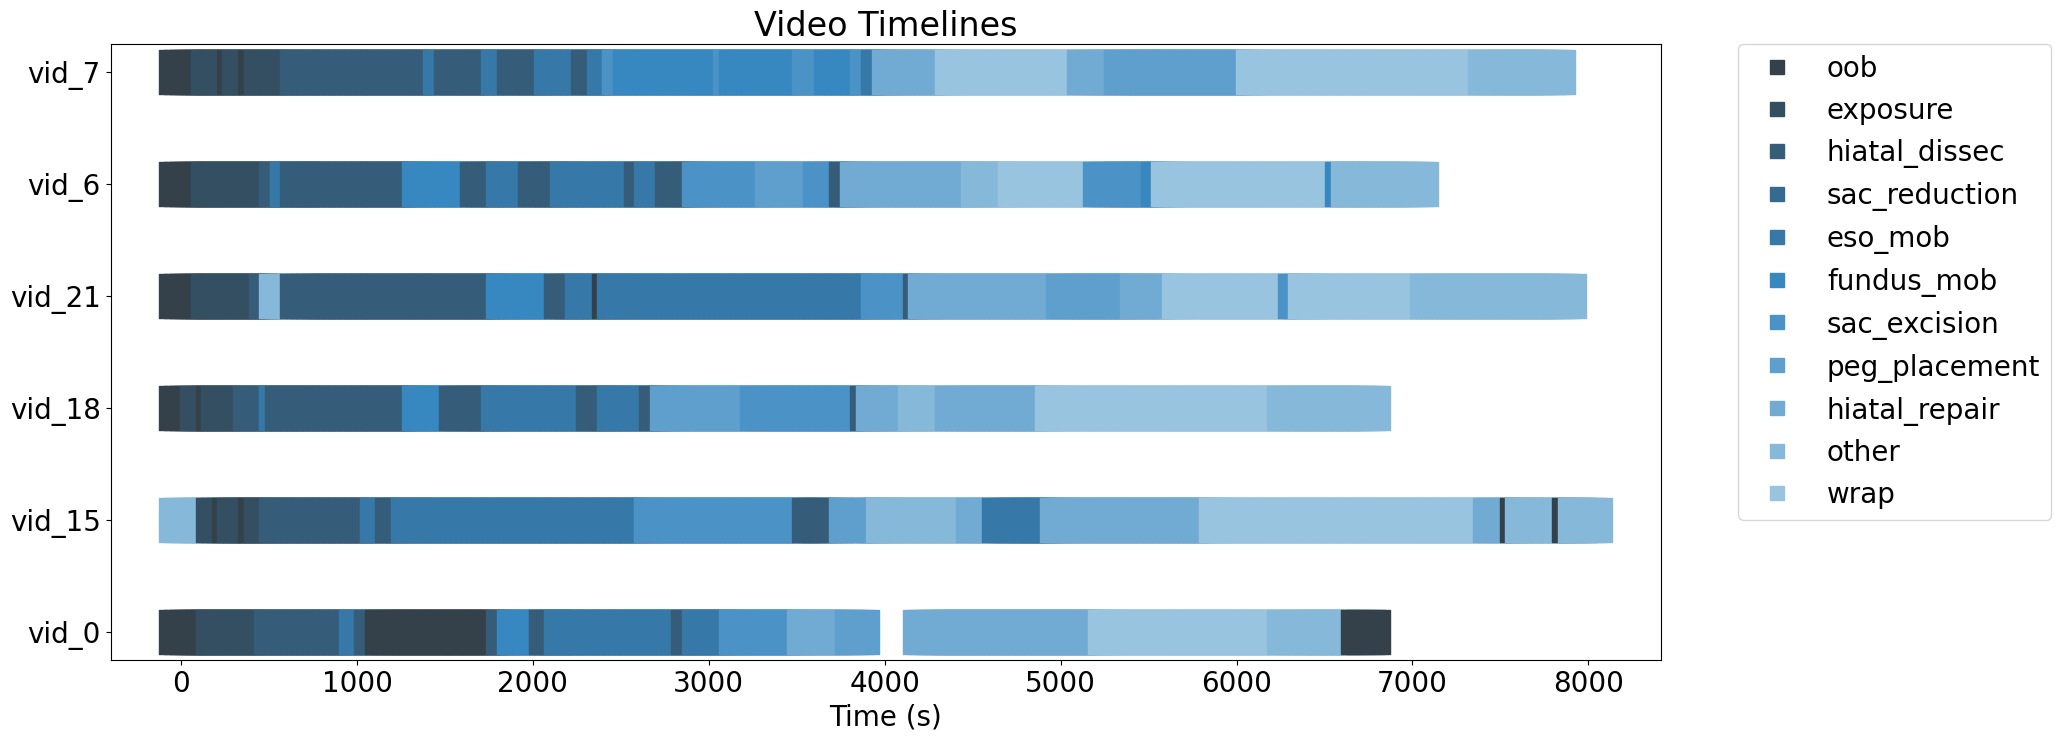

In [23]:
fig, ax = plt.subplots(figsize=(20, 8))
for vid in first_ten:
    ax.scatter(phase_df_dict[vid]['time'], phase_df_dict[vid]['vid'], c=phase_df_dict[vid]['phase'].apply(lambda x: colormapping[x]), marker='s', s=1000)
    # ax.text(-100, vid, vid, fontsize=12)
#label the y axis with the video id to the left of the timeline
ax.set_yticks(first_ten)
ax.set_xlabel('Time (s)')
ax.set_title('Video Timelines')

#add a legend
handles = [plt.plot([],[], marker="s", ms=10, ls="", mec=None, color=colormapping[phase], label=phase)[0]  for phase in phases_str]
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#make the legend font size bigger
plt.rcParams.update({'font.size': 20})
plt.savefig('../results/timelines.png', bbox_inches='tight', dpi=300)

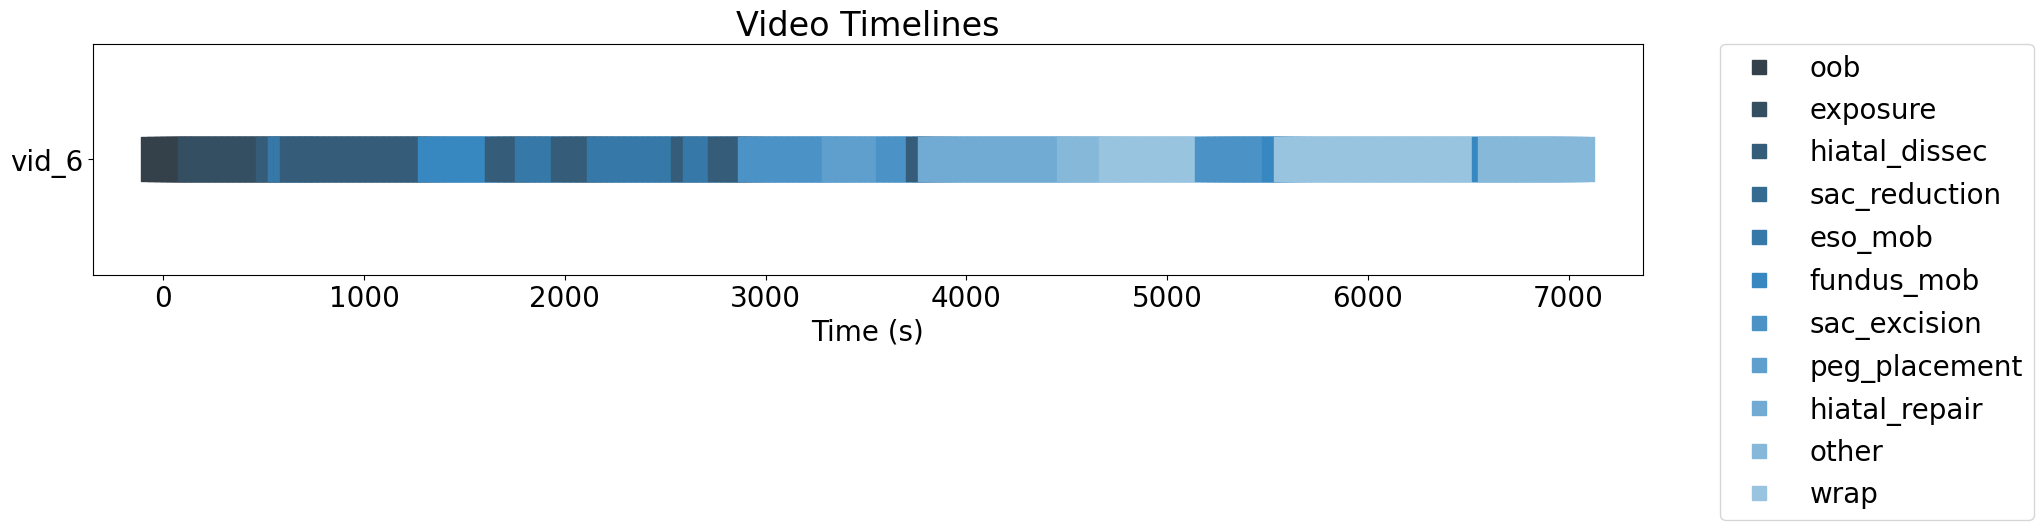

In [28]:
#now make a timeline with only one video, 'vid_0'
vid = 'vid_6'
fig, ax = plt.subplots(figsize=(20, 3))
ax.scatter(phase_df_dict[vid]['time'], phase_df_dict[vid]['vid'], c=phase_df_dict[vid]['phase'].apply(lambda x: colormapping[x]), marker='s', s=1000)
# ax.text(-100, vid, vid, fontsize=12)
#label the y axis with the video id to the left of the timeline
ax.set_yticks([vid])
ax.set_xlabel('Time (s)')
ax.set_title('Video Timelines')
handles = [plt.plot([],[], marker="s", ms=10, ls="", mec=None, color=colormapping[phase], label=phase)[0]  for phase in phases_str]
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#make the legend font size bigger
plt.rcParams.update({'font.size': 20})
plt.savefig('../results/timelines_1.png', bbox_inches='tight', dpi=300)

In [19]:
# #remove all frames for 'vid_1' from the train and test folders
# import shutil
# for i in os.listdir('frames/train'):
#     for file in os.listdir('frames/train/{}'.format(i)):
#         if file.startswith('vid_1'):
#             os.remove('frames/train/{}/{}'.format(i, file))
# for i in os.listdir('frames/test'):
#     for file in os.listdir('frames/test/{}'.format(i)):
#         if file.startswith('vid_1'):
#             os.remove('frames/test/{}/{}'.format(i, file))
            